In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load the dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Junior Data Analyst _ Data (1).xlsx')
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.0,1.509849
1,1,2020-01-01 01:00:00,0.0,1.411859
2,2,2020-01-01 02:00:00,0.0,1.023898
3,3,2020-01-01 03:00:00,0.0,0.642000
4,4,2020-01-01 04:00:00,0.0,0.960000


In [4]:
#Number of rows and columns as well as the datatypes of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Hour                                8760 non-null   int64         
 1   Date/hour start                     8760 non-null   datetime64[ns]
 2   Solar electricity generation (kWh)  8760 non-null   float64       
 3   Electricity usage (kWh)             8760 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 273.9 KB


In [5]:
# The number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print(df.head())


Number of rows: 8760
Number of columns: 4
   Hour     Date/hour start  Solar electricity generation (kWh)  \
0     0 2020-01-01 00:00:00                                 0.0   
1     1 2020-01-01 01:00:00                                 0.0   
2     2 2020-01-01 02:00:00                                 0.0   
3     3 2020-01-01 03:00:00                                 0.0   
4     4 2020-01-01 04:00:00                                 0.0   

   Electricity usage (kWh)  
0                 1.509849  
1                 1.411859  
2                 1.023898  
3                 0.642000  
4                 0.960000  


In [6]:
#check for missing values.None of the columns had missing values that we could drop.
df.isnull().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

<Axes: >

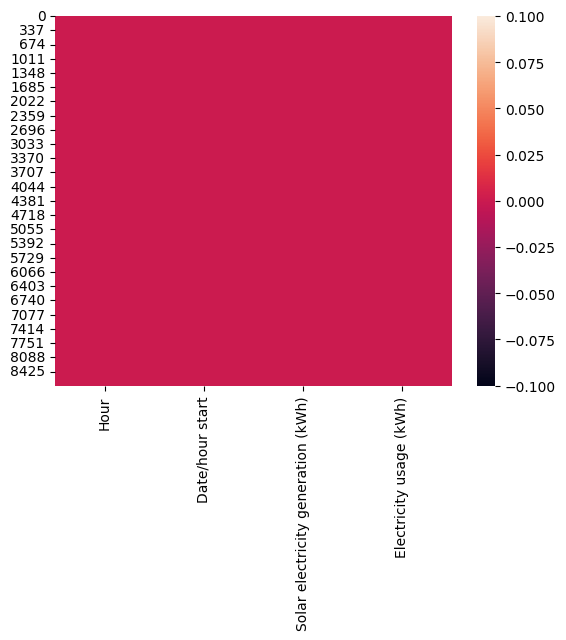

In [7]:
sns.heatmap(df.isnull())

In [8]:
#check for any duplicates;because of the nature of the data we are dealing with,we do expect to have duplicates.
df.nunique()

Hour                                    24
Date/hour start                       8760
Solar electricity generation (kWh)    1774
Electricity usage (kWh)               2761
dtype: int64

In [9]:
# Convert 'Date/hour start' column to datetime
df['Date/hour start'] = pd.to_datetime(df['Date/hour start'])

# Extract 'Date' and 'Hour' from 'Date/hour start' column
df['Date'] = df['Date/hour start'].dt.date
df['Hour'] = df['Date/hour start'].dt.hour

# Display DataFrame
print(df)

      Hour     Date/hour start  Solar electricity generation (kWh)  \
0        0 2020-01-01 00:00:00                               0.000   
1        1 2020-01-01 01:00:00                               0.000   
2        2 2020-01-01 02:00:00                               0.000   
3        3 2020-01-01 03:00:00                               0.000   
4        4 2020-01-01 04:00:00                               0.000   
...    ...                 ...                                 ...   
8755    19 2020-12-31 19:00:00                               0.012   
8756    20 2020-12-31 20:00:00                               0.003   
8757    21 2020-12-31 21:00:00                               0.000   
8758    22 2020-12-31 22:00:00                               0.015   
8759    23 2020-12-31 23:00:00                               0.000   

      Electricity usage (kWh)        Date  
0                    1.509849  2020-01-01  
1                    1.411859  2020-01-01  
2                    1.0238

In [10]:
df.tail()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Date
8755,19,2020-12-31 19:00:00,0.012,4.395600,2020-12-31
8756,20,2020-12-31 20:00:00,0.003,4.560600,2020-12-31
8757,21,2020-12-31 21:00:00,0.000,2.022000,2020-12-31
8758,22,2020-12-31 22:00:00,0.015,1.668000,2020-12-31
8759,23,2020-12-31 23:00:00,0.000,0.805919,2020-12-31


In [11]:
# Set the Date column as the index
df.set_index('Date', inplace=True)

In [12]:
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
Date,,,,
2020-01-01,0,2020-01-01 00:00:00,0.0,1.509849
2020-01-01,1,2020-01-01 01:00:00,0.0,1.411859
2020-01-01,2,2020-01-01 02:00:00,0.0,1.023898
2020-01-01,3,2020-01-01 03:00:00,0.0,0.642000
2020-01-01,4,2020-01-01 04:00:00,0.0,0.960000


In [13]:
# Extract hour from datetime
df['Hour'] = df['Date/hour start'].dt.hour


In [14]:
#calculating the average solar gen and electricity usage for each hour
avg_solar = df.groupby('Hour')['Solar electricity generation (kWh)'].mean()
avg_electricity = df.groupby('Hour')['Electricity usage (kWh)'].mean()

In [15]:
# Calculate average solar electricity generation and electricity usage for each hour
hourly_avg = df.groupby('Hour').mean()

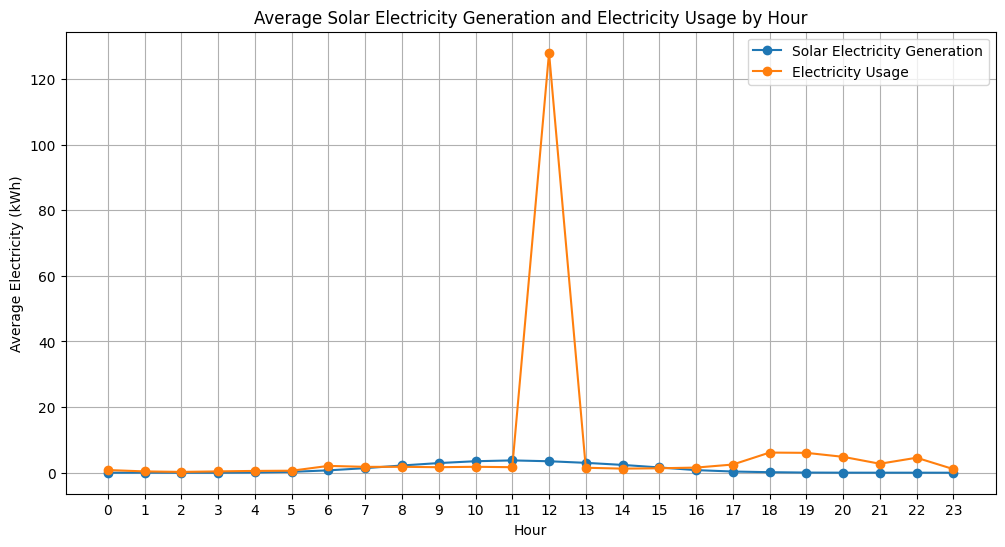

In [16]:
# Plotting
plt.figure(figsize=(12, 6))

plt.plot(hourly_avg.index, hourly_avg['Solar electricity generation (kWh)'], label='Solar Electricity Generation', marker='o')
plt.plot(hourly_avg.index, hourly_avg['Electricity usage (kWh)'], label='Electricity Usage', marker='o')

plt.title('Average Solar Electricity Generation and Electricity Usage by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Electricity (kWh)')
plt.xticks(range(24))  # Set x-axis ticks to represent each hour
plt.grid(True)
plt.legend()
plt.show()

In [17]:
# Calculating the amount of electricity bought from the electricity provider
df['Electricity bought (kWh)'] = df['Electricity usage (kWh)'] - df['Solar electricity generation (kWh)']
df['Electricity bought (kWh)'] = df['Electricity bought (kWh)'].apply(lambda x: max(0, x))  # setting negative values to zero

# show
print(df[['Date/hour start', 'Electricity bought (kWh)']])


               Date/hour start  Electricity bought (kWh)
Date                                                    
2020-01-01 2020-01-01 00:00:00                  1.509849
2020-01-01 2020-01-01 01:00:00                  1.411859
2020-01-01 2020-01-01 02:00:00                  1.023898
2020-01-01 2020-01-01 03:00:00                  0.642000
2020-01-01 2020-01-01 04:00:00                  0.960000
...                        ...                       ...
2020-12-31 2020-12-31 19:00:00                  4.383600
2020-12-31 2020-12-31 20:00:00                  4.557600
2020-12-31 2020-12-31 21:00:00                  2.022000
2020-12-31 2020-12-31 22:00:00                  1.653000
2020-12-31 2020-12-31 23:00:00                  0.805919

[8760 rows x 2 columns]


In [18]:

#The excess solar electricity generated over electricity used for each hour
df['Excess Solar Electricity (kWh)'] = df['Solar electricity generation (kWh)'] - df['Electricity usage (kWh)']

# Set negative values (where solar generation is less than usage) to zero
df['Excess Solar Electricity (kWh)'] = df['Excess Solar Electricity (kWh)'].apply(lambda x: max(0, x))  # setting negative values to zero

#show
print(df[['Date/hour start', 'Excess Solar Electricity (kWh)']])


               Date/hour start  Excess Solar Electricity (kWh)
Date                                                          
2020-01-01 2020-01-01 00:00:00                             0.0
2020-01-01 2020-01-01 01:00:00                             0.0
2020-01-01 2020-01-01 02:00:00                             0.0
2020-01-01 2020-01-01 03:00:00                             0.0
2020-01-01 2020-01-01 04:00:00                             0.0
...                        ...                             ...
2020-12-31 2020-12-31 19:00:00                             0.0
2020-12-31 2020-12-31 20:00:00                             0.0
2020-12-31 2020-12-31 21:00:00                             0.0
2020-12-31 2020-12-31 22:00:00                             0.0
2020-12-31 2020-12-31 23:00:00                             0.0

[8760 rows x 2 columns]


In [19]:
# Initialize battery charge level column
df['Battery Charge Level (kWh)'] = 0

# Iterating over rows to calculate cumulative battery charge level
max_battery_capacity = 12.5  # kWh
for i in range(1, len(df)):
    excess_solar = df.iloc[i]['Excess Solar Electricity (kWh)']
    prev_charge = df.iloc[i-1]['Battery Charge Level (kWh)']
    charge_level = min(prev_charge + excess_solar, max_battery_capacity)
    df.at[df.index[i], 'Battery Charge Level (kWh)'] = charge_level

In [20]:
#the amount of electricity that would have been bought from the provider assuming the battery is installed
df['Electricity bought with battery (kWh)'] = df['Electricity usage (kWh)'] - df['Excess Solar Electricity (kWh)']

# Set negative values (where excess solar electricity exceeds usage) to zero
df['Electricity bought with battery (kWh)'] = df['Electricity bought with battery (kWh)'].apply(lambda x: max(0, x))  # setting negative values to zero

# Display DataFrame
print(df[['Date/hour start', 'Electricity bought with battery (kWh)']])


               Date/hour start  Electricity bought with battery (kWh)
Date                                                                 
2020-01-01 2020-01-01 00:00:00                               1.509849
2020-01-01 2020-01-01 01:00:00                               1.411859
2020-01-01 2020-01-01 02:00:00                               1.023898
2020-01-01 2020-01-01 03:00:00                               0.642000
2020-01-01 2020-01-01 04:00:00                               0.960000
...                        ...                                    ...
2020-12-31 2020-12-31 19:00:00                               4.395600
2020-12-31 2020-12-31 20:00:00                               4.560600
2020-12-31 2020-12-31 21:00:00                               2.022000
2020-12-31 2020-12-31 22:00:00                               1.668000
2020-12-31 2020-12-31 23:00:00                               0.805919

[8760 rows x 2 columns]


In [21]:
# savings in electricity costs
electricity_price = 0.17  #  per kWh
df['Savings with Battery '] = df['Electricity bought with battery (kWh)'] * electricity_price
print(df['Savings with Battery '])

Date
2020-01-01    0.256674
2020-01-01    0.240016
2020-01-01    0.174063
2020-01-01    0.109140
2020-01-01    0.163200
                ...   
2020-12-31    0.747252
2020-12-31    0.775302
2020-12-31    0.343740
2020-12-31    0.283560
2020-12-31    0.137006
Name: Savings with Battery , Length: 8760, dtype: float64


In [22]:
# Extract month from the date column
df['month'] = pd.to_datetime(df['Date/hour start']).dt.month

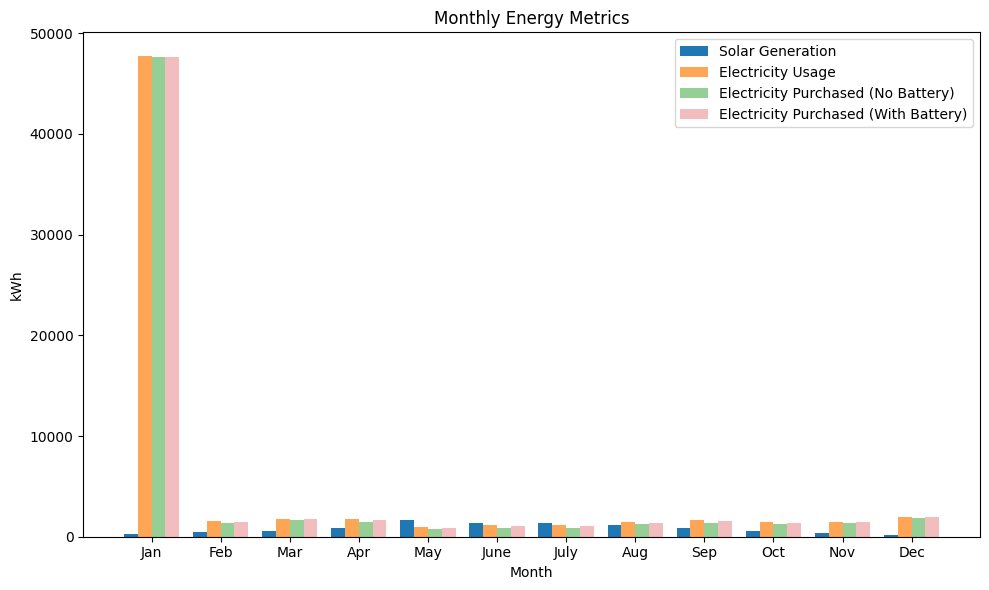

In [23]:
# Aggregate data by month
monthly_data = df.groupby('month').agg({
    'Solar electricity generation (kWh)': 'sum',
    'Electricity usage (kWh)': 'sum',
    'Electricity bought (kWh)': 'sum',
    'Electricity bought with battery (kWh)': 'sum'
}).reset_index()

# Plot using a bar chart
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(10, 6))

# Width of each bar
bar_width = 0.2

# Position of each bar on x-axis
x = range(len(months))

plt.bar(x, monthly_data['Solar electricity generation (kWh)'], width=bar_width, label='Solar Generation')
plt.bar([i + bar_width for i in x], monthly_data['Electricity usage (kWh)'], width=bar_width, label='Electricity Usage', alpha=0.7)
plt.bar([i + 2 * bar_width for i in x], monthly_data['Electricity bought (kWh)'], width=bar_width, label='Electricity Purchased (No Battery)', alpha=0.5)
plt.bar([i + 3 * bar_width for i in x], monthly_data['Electricity bought with battery (kWh)'], width=bar_width, label='Electricity Purchased (With Battery)', alpha=0.3)

plt.xlabel('Month')
plt.ylabel('kWh')
plt.title('Monthly Energy Metrics')
plt.xticks([i + 1.5 * bar_width for i in x], months)  # Adjust x-axis tick positions
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
# Constants
battery_cost = 7000
battery_capacity = 12.5  # kWh
electricity_price_2022 = 0.17  # per kWh
electricity_price_inflation_gov = 0.04
electricity_price_inflation_estimated = 0.0425
discount_rate = 0.06

In [25]:
# Project forward for 20 years from 2022
years = range(2022, 2042)
annual_savings_gov = []
annual_savings_estimated = []

for year in years:
    electricity_price_gov = electricity_price_2022 * ((1 + electricity_price_inflation_gov) ** (year - 2022))
    electricity_price_estimated = electricity_price_2022 * ((1 + electricity_price_inflation_estimated) ** (year - 2022))

    savings_gov = df['Excess Solar Electricity (kWh)'].sum() * electricity_price_gov
    savings_estimated = df['Excess Solar Electricity (kWh)'].sum() * electricity_price_estimated

    annual_savings_gov.append(savings_gov)
    annual_savings_estimated.append(savings_estimated)


In [26]:
!pip install numpy_financial

In [27]:
from numpy_financial import npv

In [28]:
 npv_gov = npv(discount_rate, annual_savings_gov)
npv_estimated = npv(discount_rate, annual_savings_estimated)

print("NPV for Scenario 1 (Government's Expected Increase):", npv_gov)
print("NPV for Scenario 2 (Estimated Increase by Naomi):", npv_estimated)

NPV for Scenario 1 (Government's Expected Increase): 20960.81263527219
NPV for Scenario 2 (Estimated Increase by Naomi): 21413.937254139077


In [29]:
from scipy.optimize import root_scalar

# Define function to calculate NPV for a given discount rate and annual savings
def calculate_npv(discount_rate, annual_savings):
    return npv(discount_rate, annual_savings)

# Define function to find IRR
def find_irr(annual_savings, battery_cost):
    irr_result = root_scalar(lambda r: calculate_npv(r, annual_savings) - battery_cost, bracket=[0, 1])
    return irr_result.root


#IRR for Scenario 1 (Government's Expected Increase)
irr_gov = find_irr(annual_savings_gov,battery_cost)

#IRR for Scenario 2 (Estimated Increase by Naomi)
irr_estimated = find_irr(annual_savings_estimated, battery_cost)

print("IRR for Scenario 1 (Government's Expected Increase):", irr_gov)
print("IRR for Scenario 2 (Estimated Increase by Naomi):", irr_estimated)


IRR for Scenario 1 (Government's Expected Increase): 0.2598263040677259
IRR for Scenario 2 (Estimated Increase by Naomi): 0.2628547326832732
